# 가위바위보 분류기 만들기

---
## 목차
1. 데이터 준비하기
2. 딥러닝 네트워크 설계하기
3. 딥러닝 네트워크 학습시키기
4. 모델 테스트
5. 모델 성능 개선 - 하이퍼파라미터 튜닝
6. 회고
---

## 1. 데이터 준비하기
### 라이브러리 버전 확인

In [10]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


### 데이터 준비하기
- 데이터 불러오기 + Resize 하기   
224x224 를 28x28 사이즈로

In [11]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [12]:
# 가위 이미지 불러와서 28*28 사이즈로 변경하기

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [13]:
# 바위 이미지 불러와서 28*28 사이즈로 변경하기

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [14]:
# 보 이미지 불러와서 28*28 사이즈로 변경하기

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수 만들기
- load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받는다.(rock_scissor_paper 폴더 위치를 적어주기)
- 가위바위보는 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것

In [15]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


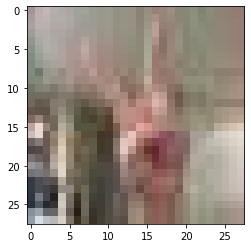

In [16]:
# 이미지 불러오기

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 2. 딥러닝 네트워크 설계하기

In [17]:
# tf.keras의 Sequential API를 이용

import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

## 3. 딥러닝 네트워크 학습시키기

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 17ms/step - loss: 28.3829 - accuracy: 0.3033
Epoch 2/10
10/10 [==============================] - 0s 17ms/step - loss: 9.6960 - accuracy: 0.3500
Epoch 3/10
10/10 [==============================] - 0s 19ms/step - loss: 3.4645 - accuracy: 0.5233
Epoch 4/10
10/10 [==============================] - 0s 21ms/step - loss: 1.7340 - accuracy: 0.6433
Epoch 5/10
10/10 [==============================] - 0s 17ms/step - loss: 0.6676 - accuracy: 0.7867
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2422 - accuracy: 0.8933
Epoch 7/10
10/10 [==============================] - 0s 19ms/step - loss: 0.1602 - accuracy: 0.9333
Epoch 8/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0473 - accuracy: 0.9833
Epoch 9/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0296 - accuracy: 0.9933
Epoch 10/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0131 - accuracy: 1.0000


- 훈련 데이터의 정확도 : 1.0으로 오버피팅됨

Epoch 1/10
10/10 [==============================] - 0s 23ms/step - loss: 0.0317 - accuracy: 0.9967 - val_loss: 7.2312 - val_accuracy: 0.3333
Epoch 2/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 7.2030 - val_accuracy: 0.3333
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 7.7471 - val_accuracy: 0.3333
Epoch 4/10
10/10 [==============================] - 0s 24ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 7.7815 - val_accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 7.7443 - val_accuracy: 0.3333
Epoch 6/10
10/10 [==============================] - 0s 24ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 8.0500 - val_accuracy: 0.3333
Epoch 7/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 8.3206 - val_accuracy: 0.3333
Epoch 8/10
10

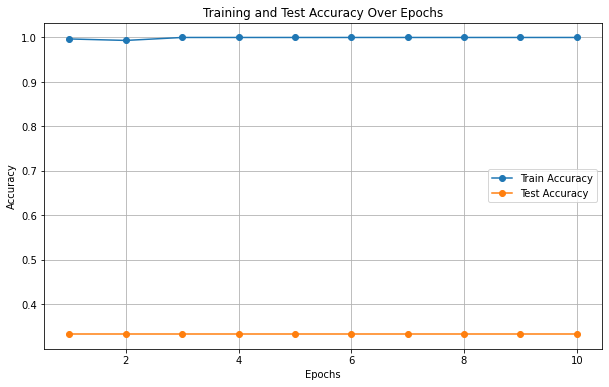

In [42]:
import matplotlib.pyplot as plt

# 모델 훈련
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 에폭에 따른 정확도 추이
train_accuracy_history = history.history['accuracy']
test_accuracy_history = history.history['val_accuracy']

# 에폭 수
epochs = np.arange(1, len(train_accuracy_history) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracy_history, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 4. 모델 테스트   
다른 친구의 이미지 데이터 300장을 test data로 하여 test accuracy 측정해보기

- 오우진님 이미지 데이터 불러오기 + Resize

In [19]:
# 데이터 불러오기

from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [20]:
# 가위 이미지 불러와서 28x28 사이즈로 변경하기

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [21]:
# 바위 이미지 불러와서 28x28 사이즈로 변경하기

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [22]:
# 보 이미지 불러와서 28x28 사이즈로 변경하기

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [23]:
# x_test, y_test 만들기

import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


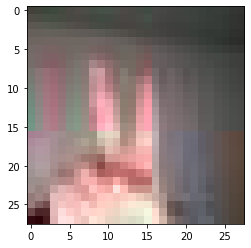

In [24]:
# 이미지 불러오기

import matplotlib.pyplot as plt

plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [68]:
# 잘못 추론한 데이터가 무엇인지 찾아보기

predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.02861635 0.01296378 0.95841986]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [5.4129574e-04 1.5930140e-03 9.9786574e-01]
라벨: 0, 예측결과: 2


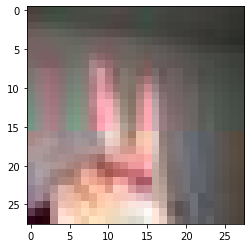

예측확률분포: [0.15100725 0.06784655 0.7811462 ]
라벨: 0, 예측결과: 2


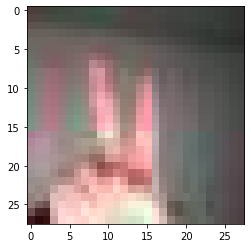

예측확률분포: [0.00727881 0.00521403 0.9875072 ]
라벨: 0, 예측결과: 2


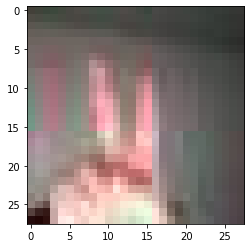

예측확률분포: [0.06460609 0.03691304 0.89848083]
라벨: 0, 예측결과: 2


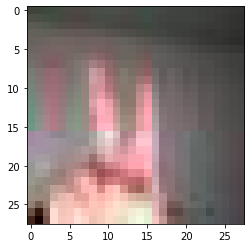

예측확률분포: [0.01835207 0.00166627 0.9799817 ]
라벨: 0, 예측결과: 2


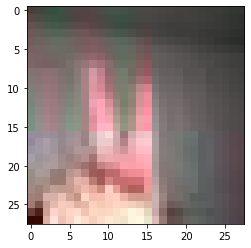

In [69]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인가?

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### test accuracy 측정

In [28]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 - 0s - loss: 4.0632 - accuracy: 0.3333
test_loss: 4.063240051269531
test_accuracy: 0.3333333432674408
model.predict() 결과 :  [2.5572383e-04 2.9384077e-01 7.0590353e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


- test accuracy가 33
- 훈련 데이터 개수를 늘려서 성능을 개선해보기로 함.
- 데이터 이미지 모양이 다양하고 개수가 많은 이선재님 데이터셋을 활용함.

> 기존의 train데이터의 이름들과 추가할 데이터의 이름이 겹침 (0.jpg~99.jpg)   
아래는 추가할 데이터의 이름 변경 작업

In [36]:
import os

paper_file_path = '/aiffel/rock_scissor_paper/lsj_paper'
paper_file_names = os.listdir(paper_file_path)
paper_file_names

FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/rock_scissor_paper/lsj_paper'

In [37]:
import os

paper_file_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/lsj_paper'
paper_file_names = os.listdir(paper_file_path)
paper_file_names

['95.jpg',
 '151.jpg',
 '219.jpg',
 '132.jpg',
 '227.jpg',
 '73.jpg',
 '78.jpg',
 '111.jpg',
 '.ipynb_checkpoints',
 '187.jpg',
 '32.jpg',
 '106.jpg',
 '136.jpg',
 '21.jpg',
 '81.jpg',
 '94.jpg',
 '176.jpg',
 '154.jpg',
 '200.jpg',
 '148.jpg',
 '47.jpg',
 '122.jpg',
 '33.jpg',
 '234.jpg',
 '174.jpg',
 '202.jpg',
 '126.jpg',
 '143.jpg',
 '155.jpg',
 '16.jpg',
 '186.jpg',
 '188.jpg',
 '11.jpg',
 '181.jpg',
 '26.jpg',
 '212.jpg',
 '72.jpg',
 '42.jpg',
 '177.jpg',
 '207.jpg',
 '201.jpg',
 '58.jpg',
 '172.jpg',
 '193.jpg',
 '120.jpg',
 '121.jpg',
 '196.jpg',
 '240.jpg',
 '79.jpg',
 '179.jpg',
 '116.jpg',
 '84.jpg',
 '198.jpg',
 '211.jpg',
 '204.jpg',
 '108.jpg',
 '112.jpg',
 '141.jpg',
 '144.jpg',
 '62.jpg',
 '185.jpg',
 '24.jpg',
 '105.jpg',
 '138.jpg',
 '140.jpg',
 '158.jpg',
 '83.jpg',
 '197.jpg',
 '189.jpg',
 '137.jpg',
 '127.jpg',
 '91.jpg',
 '2.jpg',
 '223.jpg',
 '159.jpg',
 '115.jpg',
 '46.jpg',
 '110.jpg',
 '92.jpg',
 '15.jpg',
 '12.jpg',
 '63.jpg',
 '74.jpg',
 '165.jpg',
 '4.jpg',


In [46]:
i = 100
for name in paper_file_names:
    src = os.path.join(paper_file_path, name)
    dst = str(i) + '.jpg'
    dst = os.path.join(paper_file_path, dst)
    os.rename(src, dst)
    i += 1

FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/aiffel/rock_scissor_paper/lsj_paper/95.jpg' -> '/aiffel/aiffel/rock_scissor_paper/lsj_paper/100.jpg'

## 5. 모델 성능 개선
### 하이퍼파라미터 튜닝

In [29]:
# 하이퍼파라미터 튜닝
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [30]:
# 하이퍼파라미터 튜닝
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

> n_channel_1=32 로 높여도 변화 없음

In [31]:
# 하이퍼파라미터 튜닝
n_channel_1=16
n_channel_2=16
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

> n_channel_2=16 로 낮추니 정확도 55로 상승

In [33]:
# 하이퍼파라미터 튜닝
n_channel_1=16
n_channel_2=16
n_dense=16
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                6416      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

> n_dense=16 으로 낮추니 정확도 58로 상승

## 6. 회고
### KEEP
- 데이터 준비부터 모델 테스트 단계까지의 흐름은 어느정도 이해하고 있음
- 최대한 다양한 데이터를 준비하기 위해 양손 촬영 및 다양한 각도에서 촬영해봄.

### PROBLEM
- train data를 추가하는 과정에서 오류 발생, 해결하지 못함.
- 정확도를 85 이상으로 올리지 못함.
- 위의 문제들은 전반적으로 책에서 배운 개념들을 코드로 적용할 때 어떻게 구현해야할지 매우 막막해서 발생.

### TRY
- 배운 내용을 코드로 많이 시도해보기


### Reference
- [파일명 일괄 변경](https://hogni.tistory.com/35)